In [25]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    # df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_logP = {}
    for index, row in df_main.iterrows():
        SMILES = row['Amides for LogP']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_logP[SMILES] = row['LogP']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\train.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\test.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    smiles_to_fold = {}
    for index, row in train.iterrows():
        smiles_to_fold[row['Smiles']] = row['fold_id']
    
    return train_SMILES, test_SMILES, smiles_to_fold

In [26]:
# all test(separate model for each molecule)
relevances_fluorine = {'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.187, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.368, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': -0.13910609483718872, 'O=C(N1CCCC1)C1=CC=CC=C1': -0.0785289853811264, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': -0.09564696997404099, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 0.267, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.175, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.455, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': -0.17767366766929626, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': -0.24370118975639343, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 0.4168475270271301, 'O=C(N1CCCCC1)C1=CC=CC=C1': -0.24286195635795593, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.244, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': -0.5416865944862366, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.563825786113739, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': 0.05, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': -0.056, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': 0.214, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': -0.203, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': -0.8497052192687988, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': 0.071, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': -0.07352640479803085, 'O=C(N1CCC1)C1=CC=CC=C1': -0.21231365203857422, 'FC1CN(C1)C(=O)C1=CC=CC=C1': -0.203, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': -0.282, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': -0.022, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.134, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.219, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': -0.018, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': -0.043, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.024, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.012, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': -0.136, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.05, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': -0.047, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.087, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.107, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.075, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.349, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.035, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': -0.098, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.383, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.059, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.046, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.104, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.07, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.296, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.118, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': -0.167, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.135, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': -0.069, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': -0.233, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 0.6178117394447327, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': 0.093, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': -0.037, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': -0.177, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': -0.096}
# 3 models for all models to be in OOS
# relevances_fluorine = {'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': -0.08, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.274, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': -0.7216649651527405, 'O=C(N1CCCC1)C1=CC=CC=C1': -0.639299213886261, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': -0.256625771522522, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 0.118, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': -0.001, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.094, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': -0.445708304643631, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': -0.018178947269916534, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': -0.3820215165615082, 'O=C(N1CCCCC1)C1=CC=CC=C1': -0.22912079095840454, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.022, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': -0.39692091941833496, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': -0.30552613735198975, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': -0.15, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': 0.005, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': -0.129, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': -0.219, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': -0.37980958819389343, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': -0.127, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': -0.9359162449836731, 'O=C(N1CCC1)C1=CC=CC=C1': -0.5892441868782043, 'FC1CN(C1)C(=O)C1=CC=CC=C1': -0.401, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': -0.349, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': -0.07, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.245, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.183, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': -0.197, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': -0.051, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.155, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.235, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': -0.339, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.322, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': -0.315, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': -0.203, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': -0.271, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': -0.203, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.27, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': -0.292, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': -0.173, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.305, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.228, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.222, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.308, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': -0.234, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.303, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': -0.173, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': -0.435, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.207, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': -0.451, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': -0.127, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 0.24803608655929565, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': -0.008, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.013, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': -0.162, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': 0.032}


SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

cyclobutane = {1: {}, 2: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

In [27]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [28]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_secondary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return False
    
    return True


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_secondary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    # print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

cyclopentane CF3 FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1 2.12 0.368 Used for train 0
cyclohexane CF3 FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1 2.54 0.455 Used for train 1
cyclohexane CHF2 [H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1 2.04 -0.047 Used for train 0
cyclohexane CH2F [H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1 2.0 0.087 Used for train 0
cyclopentane CHF2 [H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1 1.88 0.107 Used for train 0
cyclopentane CH2F [H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1 1.75 0.075 Used for train 0
cyclobutane CF3 FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1 1.75 0.349 Used for train 1
cyclobutane CHF2 [H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1 1.51 0.035 Used for train 0
cyclobutane CH2F [H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1 1.4 -0.098 Used for train 0
['CH2F', 'CHF2', 'CF3'] [-0.098, 0.035, 0.349]
['CH2F', 'CHF2', 'CF3'] [0.075, 0.107, 0.368]
['CH2F', 'CHF2', 'CF3'] [0.087, -0.047, 0.455]
[] []
['CH2F', 'CHF2', 'CF3'] [[-0.098, 0.075, 0.087], [0.035, 0.107, -0.047], [0.349, 0.368, 0.455]]


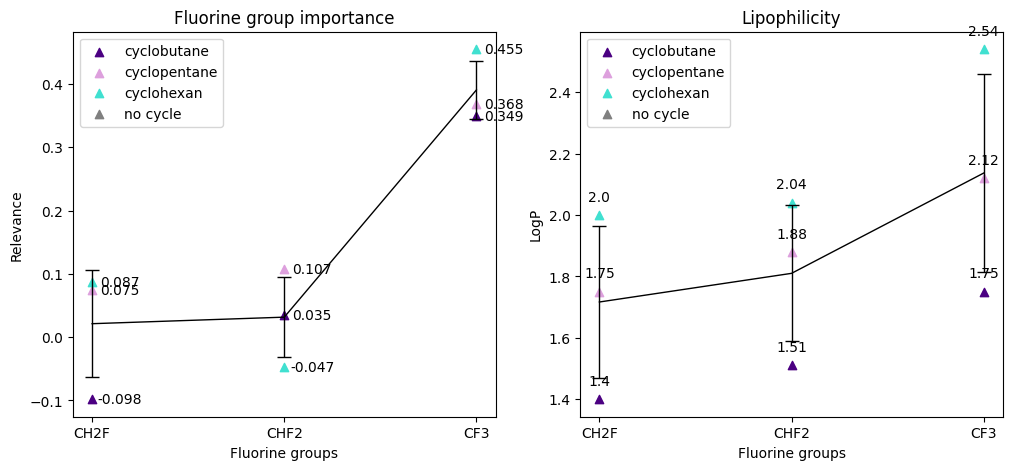

cyclobutane CHF FC1CN(C1)C(=O)C1=CC=CC=C1 0.94 -0.203 Used for train 1
cyclopentane CHF FC1CCN(C1)C(=O)C1=CC=CC=C1 0.91 -0.282 Used for train 1
cyclopentane gem-CF2 FC1(F)CCN(C1)C(=O)C1=CC=CC=C1 1.35 -0.022 Used for train 0
cyclopentane CHF F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1 1.01 -0.134 Used for train 0
cyclopentane CHF F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1 1.08 -0.219 Used for train 0
cyclohexane CHF FC1CCCN(C1)C(=O)C1=CC=CC=C1 1.26 -0.018 Used for train 0
cyclohexane gem-CF2 FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1 1.65 -0.043 Used for train 0
cyclohexane CHF F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1 0.58 -0.024 Used for train 0
cyclohexane CHF F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1 1.35 -0.012 Used for train 1
cyclohexane CHF F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1 1.15 -0.136 Used for train 1
cyclohexane CHF F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1 1.26 -0.05 Used for train 1
cyclohexane CF3 FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1 2.21 0.383 Used for train 1
cyclohexane CHF2 [H]C(F)(F)C1CCCN(C1)C(=O)C1

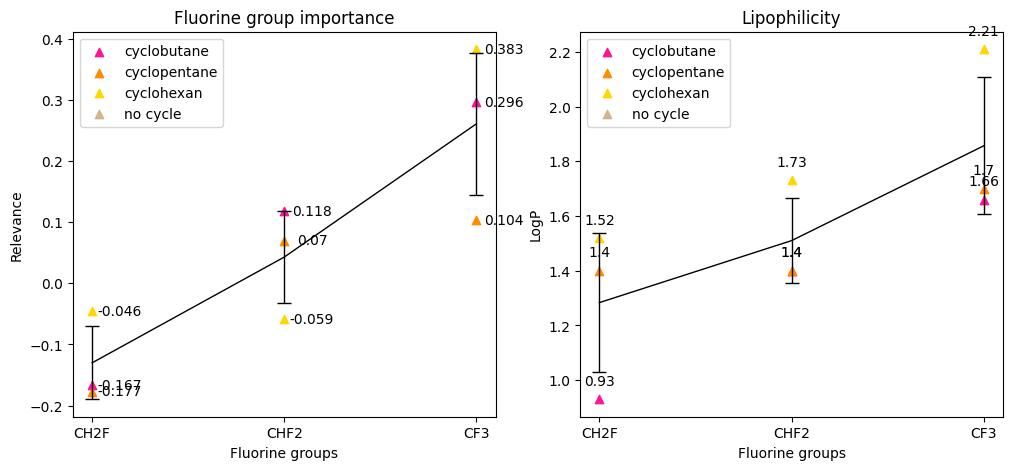

cyclohexane CF3 FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1 2.2 0.135 Used for train 1
cyclohexane CH2F [H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1 1.45 -0.069 Used for train 1
cyclohexane CHF FC1CCN(CC1)C(=O)C1=CC=CC=C1 1.31 -0.233 Used for test 
cyclohexane gem-CF2 FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1 1.51 0.093 Used for test 
cyclohexane CHF2 [H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1 1.67 -0.037 Used for test 
['CH2F', 'CHF2', 'CF3'] [-0.069, -0.037, 0.135]
[] []
['CH2F', 'CHF2', 'CF3'] [[-0.069], [-0.037], [0.135]]


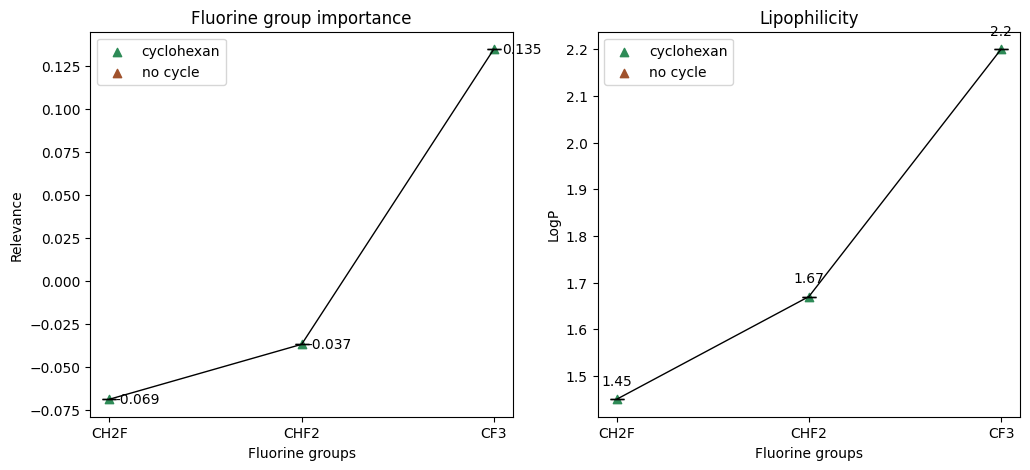

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem

cyclobutane_color = {1: 'indigo', 2: 'deeppink'}
cyclopentane_color = {1: 'plum', 2: 'darkorange'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'no cycle'

cyclobutane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}}
cyclopentane_logP = {1: {'H': [1.19]}, 2: {'H': [1.19]}}
cyclohexan_logP = {1: {'H': [1.39]}, 2: {'H': [1.39]}, 3: {'H': [1.39]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():

        smiles_type = "Outlier"
        fold_id = ""
        # print(SMILES in train_smiles, SMILES)
        if Chem.CanonSmiles(SMILES) in train_smiles:
            smiles_type = "Used for train"
            fold_id = f"{smiles_to_fold[SMILES]}"
        if Chem.CanonSmiles(SMILES) in test_smiles:
            smiles_type = "Used for test"
            
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    


primary amines

In [30]:
# separate model for each molecule
relevances_fluorine = {'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.102, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': 0.148, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 0.5560212731361389, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.10438874363899231, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.07871818542480469, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.084, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 0.102, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.48, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.204, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.077, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.152, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.139, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.065, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': -0.169, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 0.148, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': -0.117, 'CCNC(=O)C1=CC=CC=C1': -0.12051695585250854, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': -0.117, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.092, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.292, 'CCCNC(=O)C1=CC=CC=C1': 0.205240398645401, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': 0.098, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': 0.11, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': 0.044, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': 0.033, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': 0.181, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': 0.16, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': 0.074, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': 0.079, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': -0.036, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 0.068, 'O=C(NC1CC1)C1=CC=CC=C1': -0.43602603673934937, 'O=C(NC1CCCC1)C1=CC=CC=C1': 0.07746684551239014, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 0.5208727121353149, 'CCCCNC(=O)C1=CC=CC=C1': 0.5117113590240479, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 0.5353040099143982, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': 0.01, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.657, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.666, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.367, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.073, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': -0.212, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.14091069996356964, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': -0.1338529884815216, 'O=C(NC1CC11CC1)C1=CC=CC=C1': -0.3784183859825134, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': 0.174, 'O=C(NC1CCC1)C1=CC=CC=C1': 0.14188742637634277, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.076, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.364, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': -0.109, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': 0.031, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.015, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.24, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -0.067, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.258}
# all test (3 models)
# relevances_fluorine = {'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.231, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': 0.006, 'O=C(NC1CCCCC1)C1=CC=CC=C1': -0.4146385192871094, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': -0.7518543601036072, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': -0.4445301592350006, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.07, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': -0.199, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.183, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.183, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.152, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.152, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.24, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.362, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': -0.074, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': -0.297, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': -0.299, 'CCNC(=O)C1=CC=CC=C1': -0.1120133027434349, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': -0.257, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': -0.15, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.426, 'CCCNC(=O)C1=CC=CC=C1': -0.07692481577396393, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': 0.025, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': -0.039, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': -0.057, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': -0.09, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': -0.063, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': -0.154, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': -0.062, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': 0.071, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.071, 'FC(F)CCCNC(=O)C1=CC=CC=C1': -0.15, 'O=C(NC1CC1)C1=CC=CC=C1': -0.4696226716041565, 'O=C(NC1CCCC1)C1=CC=CC=C1': -0.4564633369445801, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 0.13098835945129395, 'CCCCNC(=O)C1=CC=CC=C1': -0.05925730615854263, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': -0.061166733503341675, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': 0.093, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.523, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.557, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.274, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': -0.022, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': -0.105, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': -0.37982404232025146, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': -0.33135557174682617, 'O=C(NC1CC11CC1)C1=CC=CC=C1': -0.4612032175064087, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': -0.041, 'O=C(NC1CCC1)C1=CC=CC=C1': 0.017673790454864502, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.001, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.276, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': -0.037, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': 0.02, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.018, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.338, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -0.294, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.168}

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

In [31]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_primary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 4
FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 4
O=C(NC1CCCCC1)C1=CC=CC=C1 () non-F inf
O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1 () non-F inf
O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1 () non-F inf
FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 1
FCC1(CCC1)NC(=O)C1=CC=CC=C1 ((2, 1, 0),) CH2F 1
FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 3
FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 3
[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 3
[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 3
[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((2, 0, 1),) CH2F 3
[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((2, 0, 1),) CH2F 3
[H]C(F)(F)CNC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 1
[H]C(F)(F)CCNC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 2
[H]C([H])(F)CCNC(=O)C1=CC=CC=C1 ((2, 0, 1),) CH2F 2
CCNC(=O)C1=CC=CC=C1 () non-F inf
[H]C([H])(F

cyclobutane CF3 FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1 2.51 0.084
cyclobutane CH2F FCC1(CCC1)NC(=O)C1=CC=CC=C1 2.03 0.102
methane CHF2 [H]C(F)(F)CNC(=O)C1=CC=CC=C1 1.37 -0.169
methane CH2F [H]C([H])(F)CNC(=O)C1=CC=CC=C1 1.07 -0.067
cyclobutane CHF2 FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1 2.48 0.258
cyclobutane ['CH2F', 'CHF2', 'CF3'] [0.102, 0.258, 0.084]
cyclopropane [] []
cyclopentane [] []
cyclohexan [] []
cycloheptane [] []
methane ['CH2F', 'CHF2'] [-0.067, -0.169]
['CH2F', 'CHF2', 'CF3'] [[0.102, -0.067], [0.258, -0.169], [0.084]]
CH2F 1.5499999999999998
CHF2 1.925
CF3 2.51


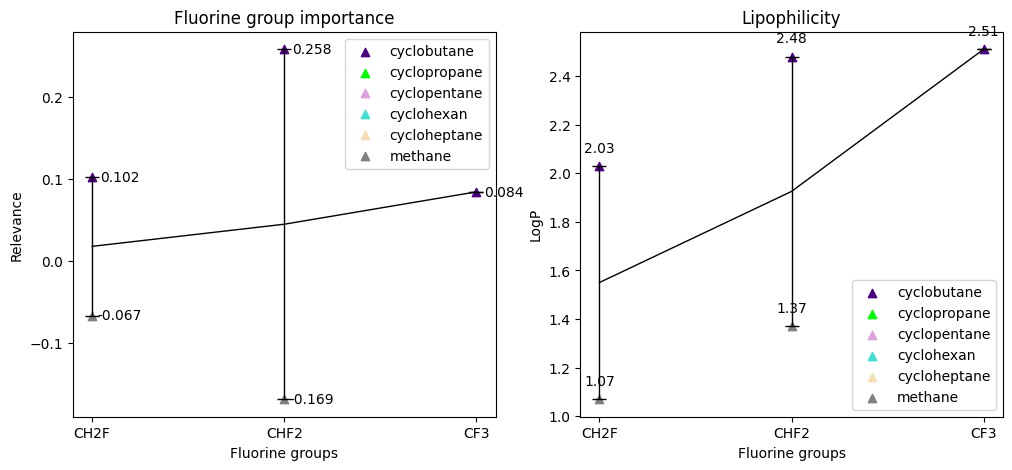

methane CHF2 [H]C(F)(F)CCNC(=O)C1=CC=CC=C1 1.49 0.148
methane CH2F [H]C([H])(F)CCNC(=O)C1=CC=CC=C1 1.28 -0.117
cyclopentane gem-CF2 FC1(F)CCCC1NC(=O)C1=CC=CC=C1 1.87 0.11
cyclohexane gem-CF2 FC1(F)CCCCC1NC(=O)C1=CC=CC=C1 2.16 0.044
cyclohexane gem-CF2 FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1 2.56 0.181
methane gem-CF2 CCC(F)(F)CNC(=O)C1=CC=CC=C1 2.04 0.079
cyclobutane CF3 FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1 2.54 0.657
cyclopropane CF3 FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1 1.79 0.666
cyclopropane CF3 FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1 2.16 0.367
cyclopropane CHF2 [H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1 1.64 0.073
cyclopropane CHF2 [H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1 1.36 -0.212
cyclobutane CHF2 [H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1 1.94 0.076
methane CF3 FC(F)(F)CCNC(=O)C1=CC=CC=C1 1.93 0.364
cyclobutane gem-CF2 FC1(F)CCC1NC(=O)C1=CC=CC=C1 1.7 -0.109
cyclobutane CH2F [H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1 1.85 -0.015
cyclobutane ['CH2F', 'CHF2', 'CF3'] [-0.015, 0.

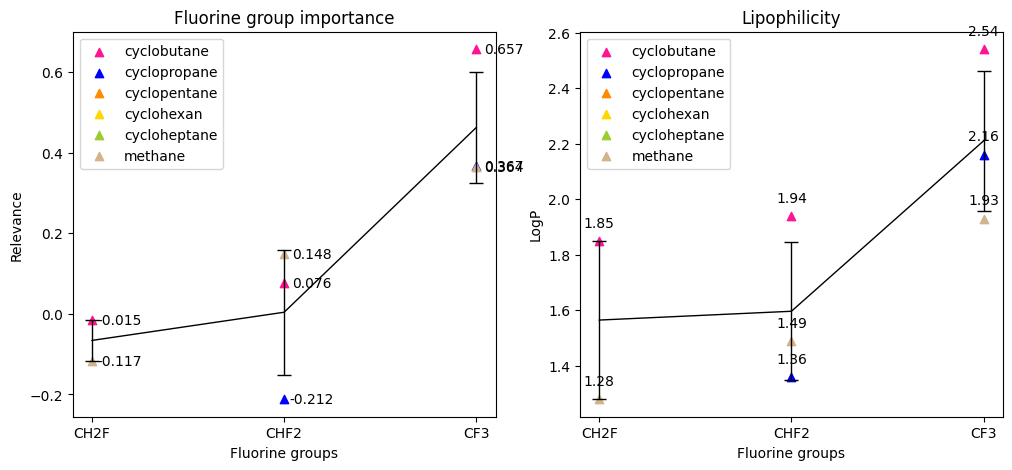

cyclobutane CF3 FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 2.82 0.48
cyclobutane CF3 FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 2.62 0.204
cyclobutane CHF2 [H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.97 0.077
cyclobutane CHF2 [H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.98 0.152
cyclobutane CH2F [H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.78 -0.139
cyclobutane CH2F [H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.77 -0.065
methane CH2F [H]C([H])(F)CCCNC(=O)C1=CC=CC=C1 1.56 -0.117
methane CHF2 [H]C(F)(F)CCCNC(=O)C1=CC=CC=C1 1.76 0.092
methane CF3 FC(F)(F)CCCNC(=O)C1=CC=CC=C1 2.28 0.292
cyclobutane gem-CF2 FC1(F)CC(C1)NC(=O)C1=CC=CC=C1 1.94 0.098
cyclohexane gem-CF2 FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1 2.31 0.033
cyclohexane gem-CF2 FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1 2.57 0.16
methane gem-CF2 CC(F)(F)CCNC(=O)C1=CC=CC=C1 1.81 -0.036
methane CHF2 FC(F)CCCNC(=O)C1=CC=CC=C1 1.76 0.068
cyclopentane gem-CF2 FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1 2.02 0.031
cyclobutane ['CH2F', 'CHF2', 'CF3'] [-0

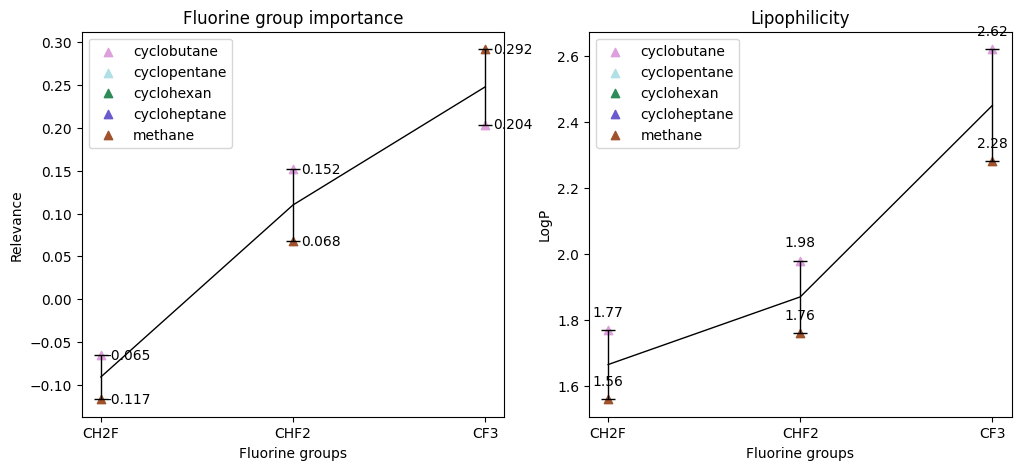

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
cycloheptane_color = {1: 'wheat', 2: 'yellowgreen', 3: 'slateblue', 4: 'sandybrown'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna', 4: 'blue'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
cycloheptane_name = 'cycloheptane'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.29]}, 2: {'H': [1.29]}}
cyclobutane_logP = {1: {'H': [1.95]}, 2: {'H': [1.95]}, 3: {'H': [1.95]}}
cyclopentane_logP = {1: {'H': [2.23]}, 2: {'H': [2.23]}, 3: {'H': [2.23]}}
cyclohexan_logP = {1: {'H': [2.72]}, 2: {'H': [2.72]}, 3: {'H': [2.72]}, 4: {'H': [2.72]}}
cycloheptane_logP = {1: {'H': [3.03]}, 2: {'H': [3.03]}, 3: {'H': [3.03]}, 4: {'H': [3.03]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}, 4: {}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    print("="*30)
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP),
                                                    (cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(label, X_local, y_relevance)
        # lists = sorted(zip(*[X_local, y_relevance]))
        # new_x, new_y = list(zip(*lists))
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        print(X[i], mean_logP_Y[i])
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    


--------

--------

--------

--------

--------

ACIDIC SME

In [33]:
# separate model for each molecule
relevances_fluorine = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 0.8385061025619507, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 1.100967526435852, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.2069711685180664, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 0.318, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 0.179, 'O=C(NC1=CC=CC=C1)C1CCC1': 0.6919602751731873, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': 0.158, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.364, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.135, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.362, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.236, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.2, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.185, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.115, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.001, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': 0.15, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': 0.108, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': 0.34, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': 0.194, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': 0.345, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': 0.278, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': 0.377, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': 0.153, 'FC(F)CCCC(=O)NC1=CC=CC=C1': 0.1, 'O=C(NC1=CC=CC=C1)C1CC1': 0.07960078120231628, 'O=C(NC1=CC=CC=C1)C1CCCC1': 0.6989073753356934, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 0.5161060690879822, 'CCCCC(=O)NC1=CC=CC=C1': 0.4149327874183655, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.077, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': -0.3112223148345947, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': -0.6478965878486633, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.757, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.083, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.042, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.575, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.288, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.014, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.15, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': -0.238, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 0.20668798685073853, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': 0.05, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 0.105, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': -0.11, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': 0.227, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': 0.157, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 1.1566007137298584, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.6454155445098877, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.14, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': 0.172, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.4221980571746826, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': 0.173, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': 0.115}
# all test (3 models)
# relevances_fluorine = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 0.44056186079978943, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 0.5480213761329651, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.7454058527946472, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 0.102, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 0.007, 'O=C(NC1=CC=CC=C1)C1CCC1': -0.12064038217067719, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': -0.042, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.038, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.137, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.035, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.035, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.082, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.082, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.151, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.151, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': 0.041, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': 0.132, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': 0.165, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': 0.116, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': 0.138, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': 0.118, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': 0.115, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': -0.006, 'FC(F)CCCC(=O)NC1=CC=CC=C1': -0.157, 'O=C(NC1=CC=CC=C1)C1CC1': -0.25781968235969543, 'O=C(NC1=CC=CC=C1)C1CCCC1': 0.2580246925354004, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 0.4021790027618408, 'CCCCC(=O)NC1=CC=CC=C1': 0.07283833622932434, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': -0.013, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': -0.5340924263000488, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': 0.02284042164683342, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.449, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.077, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': -0.055, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.602, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.521, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': -0.162, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.103, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': -0.105, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 0.219065323472023, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': 0.049, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 0.132, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': 0.147, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': 0.124, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': 0.13, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 0.2386067807674408, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.42546308040618896, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.119, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': 0.104, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.24839764833450317, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': 0.225, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': 0.003}

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1


In [34]:
def find_the_closest_oxygen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'o':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance - 2

In [35]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_oxygen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen, SMILES_to_cycle_type[SMILES])

O=C(NC1=CC=CC=C1)C1CCCCC1 () non-F inf cyclohexane
O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 3 bicyclo[3.1.0]hexane
FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 3 bicyclo[3.1.0]hexane
O=C(NC1=CC=CC=C1)C1CCC1 () non-F inf cyclobutane
FCC1(CCC1)C(=O)NC1=CC=CC=C1 ((2, 1, 0),) CH2F 0 cyclobutane
FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1 ((3, 1, 0, 2),) CHF2 0 cyclobutane
FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 0 cyclobutane
FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 2 cyclobutane
FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 2 cyclobutane
[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 2 cyclobutane
[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 2 cyclobutane
[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1

cyclopentane gem-CF2 FC1(F)CCCC1C(=O)NC1=CC=CC=C1 2.25 0.108
cyclohexane gem-CF2 FC1(F)CCCCC1C(=O)NC1=CC=CC=C1 2.5 0.194
cyclohexane gem-CF2 FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1 2.9 0.345
methane gem-CF2 CCC(F)(F)CC(=O)NC1=CC=CC=C1 2.26 0.153
cyclobutane CF3 FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 2.88 0.757
cyclobutane CHF2 [H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 2.22 0.083
cyclobutane CH2F [H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 2.11 0.042
cyclopropane CF3 FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 2.98 0.575
cyclopropane CF3 FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 2.12 0.288
cyclopropane CHF2 [H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 2.28 0.014
cyclopropane CHF2 [H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 2.35 0.15
cyclopropane CH2F [H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 1.12 -0.238
cyclopropane gem-CF2 FC1(F)CC1C(=O)NC1=CC=CC=C1 2.07 -0.11
cyclobutane gem-CF2 FC1(F)CCC1C(=O)NC1=CC=CC=C1 2.03 0.172
['CH2F', 'CHF2', 'CF3'] [-0.238, 0.15, 0.288]
['CH2F', 'CHF2', 'CF3'] [0.042, 0.

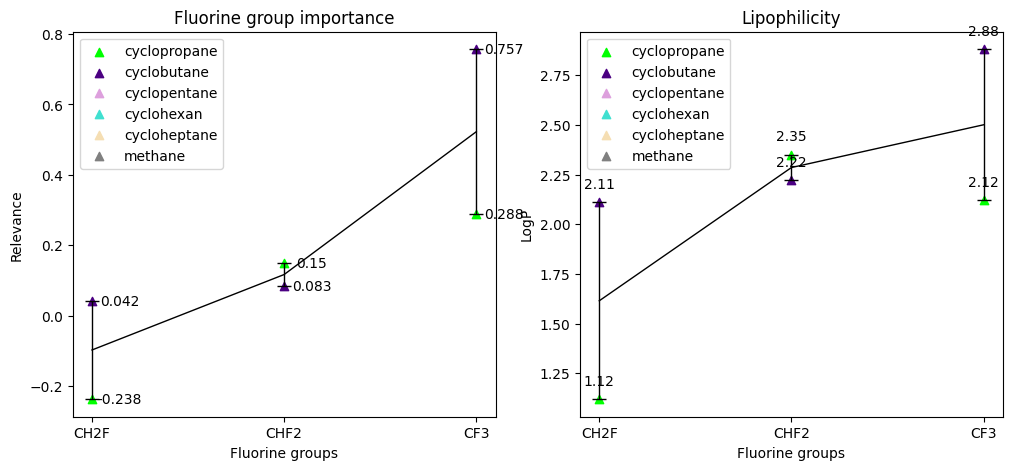

cyclobutane CF3 FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 3.02 0.362
cyclobutane CF3 FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.72 0.236
cyclobutane CHF2 [H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.39 0.2
cyclobutane CHF2 [H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.23 0.185
cyclobutane CH2F [H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.14 -0.115
cyclobutane CH2F [H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 1.96 -0.001
cyclobutane gem-CF2 FC1(F)CC(C1)C(=O)NC1=CC=CC=C1 2.26 0.15
cyclopentane gem-CF2 FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1 2.5 0.34
cyclohexane gem-CF2 FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1 3.03 0.278
methane CHF2 FC(F)CCCC(=O)NC1=CC=CC=C1 2.06 0.1
cyclohexane gem-CF2 FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1 2.72 0.173
methane gem-CF2 CC(F)(F)CCC(=O)NC1=CC=CC=C1 2.12 0.115
[] []
['CH2F', 'CHF2', 'CF3'] [-0.001, 0.185, 0.236]
[] []
[] []
[] []
['CHF2'] [0.1]
['CH2F', 'CHF2', 'CF3'] [[-0.001], [0.185, 0.1], [0.236]]


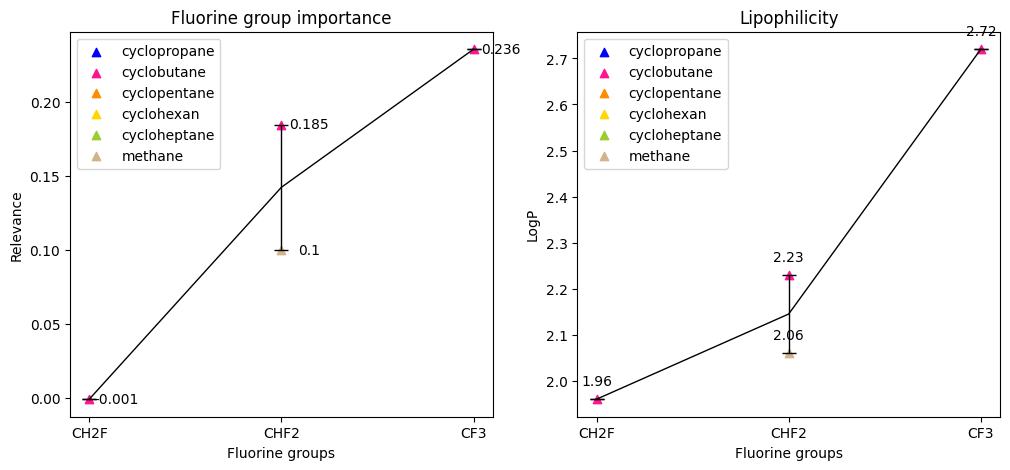

cyclohexane gem-CF2 FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1 2.95 0.377
cyclohexane gem-CF2 FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1 2.63 0.157
[] []
[] []
[] []
[] []
[] []
[] []


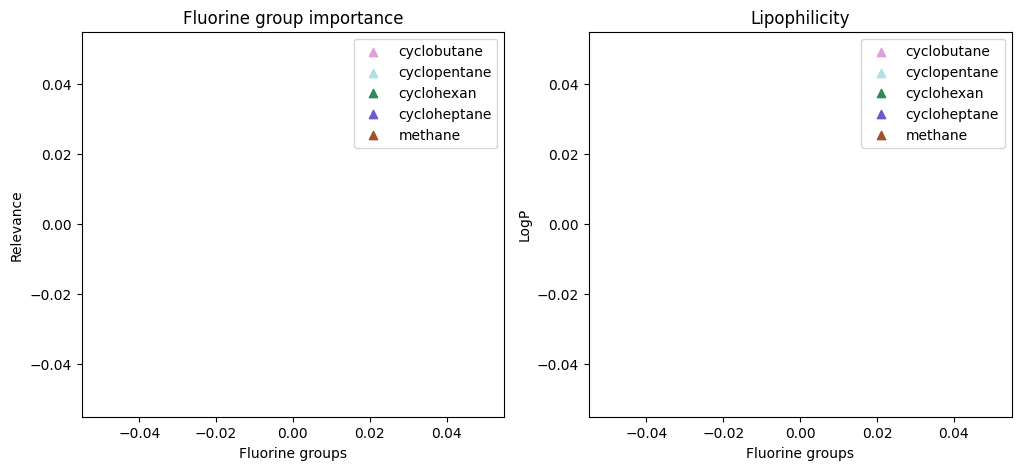

In [36]:
import matplotlib.pyplot as plt
import numpy as np

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
cycloheptane_color = {1: 'wheat', 2: 'yellowgreen', 3: 'slateblue', 4: 'sandybrown'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
cycloheptane_name = 'cycloheptane'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.92]}, 2: {'H': [1.92]}}
cyclobutane_logP = {1: {'H': [2.26]}, 2: {'H': [2.26]}, 3: {'H': [2.26]}}
cyclopentane_logP = {1: {'H': [2.68]}, 2: {'H': [2.68]}, 3: {'H': [2.68]}}
cyclohexan_logP = {1: {'H': [2.49]}, 2: {'H': [2.49]}, 3: {'H': [2.49]}, 4: {'H': [2.49]}}
cycloheptane_logP = {1: {'H': [3.24]}, 2: {'H': [3.24]}, 3: {'H': [3.24]}, 4: {'H': [3.24]}}
methane_logP = {1: {}, 2: {}, 3: {}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP),
                                                    (cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    
